In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

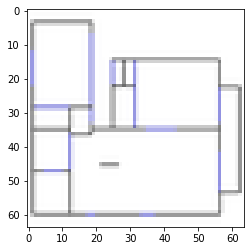

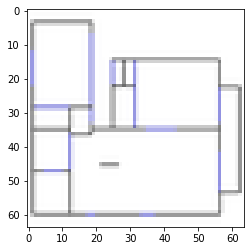

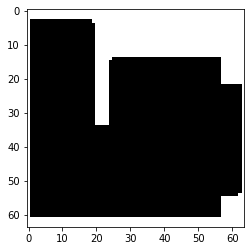

In [2]:

def process(path):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE).astype('float32')/255
    shape_i = np.ones((64,64))
    for i in range(64):
        idxs = np.where(image[i,:]<.9)[0]
        if len(idxs):
            shape_i[i,min(idxs):max(idxs)+1] = (max(idxs)-min(idxs)+1)*[0.]

    shape_j = np.ones((64,64))
    for j in range(64):
        idxs = np.where(image[:,j]<.9)[0]
        if len(idxs):
            shape_j[min(idxs):max(idxs)+1,j] = (max(idxs)-min(idxs)+1)*[0.]

    shape = 1-(1-shape_i)*(1-shape_j)
    shape = np.stack(3*[shape],axis=2)
    image = cv2.imread(path).astype('float32')/255
    
    new = np.zeros((64,64,3))

    indices_i,indices_j  = np.where(image[:,:,0]<0.2)
    new[indices_i,indices_j,0] = 1
    new[indices_i,indices_j,1] = 1
    new[indices_i,indices_j,2] = 0

    indices_black_i,indices_black_j = np.where(image[:,:,1]>0.72)

    new[indices_black_i,indices_black_j,0] = 1
    new[indices_black_i,indices_black_j,1] = 1
    new[indices_black_i,indices_black_j,2] = 1

    indices_red_i, indices_red_j = np.where((image[:,:,0]>0.5)& (image[:,:,1]<0.70)& (image[:,:,2]<0.7))

    new[indices_red_i,indices_red_j,0] = 1
    new[indices_red_i,indices_red_j,1] = 0
    new[indices_red_i,indices_red_j,2] = 0
    for i in range(64):
        for j in range(64):
            if sum(new[i,j,:])==0:
                new[i,j,:]=[1,0,0]
            elif sum(new[i,j,:])==1:
                new[i,j,:]=[0,0,0]
    new=image
    return image, new, shape


path = 'sample2.png'
out =process(path)
for img in out:
    plt.imshow(img)
    plt.show()


In [3]:
from os import listdir
import os
from os.path import isfile, join

os.makedirs('images')
os.makedirs('images/lines')
os.makedirs('images/lines/lines')
os.makedirs('images/shapes')
os.makedirs('images/shapes/shapes')
mypath = 'dataset/images64/'
onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[-1]=='g']

In [4]:
for idx, path in enumerate(onlyfiles):
    image, new, shape = process(path)
    plt.imsave('images/lines/lines/line_{}.png'.format(idx), new)
    plt.imsave('images/shapes/shapes/shape_{}.png'.format(idx), shape)

In [5]:
import torchvision
import torch
from torchvision import transforms
preprocessing = transforms.Compose([
    transforms.Resize(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
lines = torchvision.datasets.ImageFolder('images/lines/',
                                        transform=preprocessing)

lines = torch.utils.data.DataLoader(lines,
                                   batch_size=64,
                                   shuffle=False,
                                   drop_last=True,
                                   num_workers=0)


preprocessing = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(64),
    transforms.ToTensor(),
])
shapes = torchvision.datasets.ImageFolder('images/shapes/',
                                        transform=preprocessing)

shapes = torch.utils.data.DataLoader(shapes,
                                   batch_size=64,
                                   shuffle=False,
                                   drop_last=True,
                                   num_workers=0)

In [6]:
b_lines = next(iter(lines))[0]
b_shapes = next(iter(shapes))[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


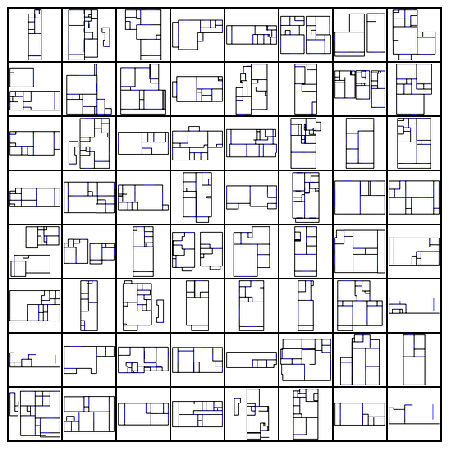

In [7]:
nrow=8
normalize=False
padding=2
import torchvision.utils as vutils
samples = b_lines
i = vutils.make_grid(samples, normalize=normalize, padding=padding)
i = np.transpose(i.cpu().detach(), (1, 2, 0))
fig = plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(i)
plt.show()

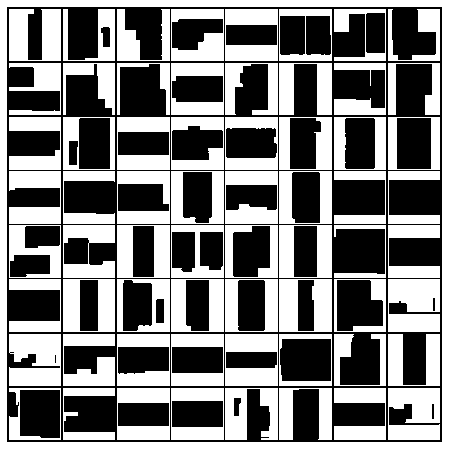

In [8]:
nrow=8
normalize=False
padding=2
import torchvision.utils as vutils
samples = b_shapes
i = vutils.make_grid(samples, normalize=normalize, padding=padding)
i = np.transpose(i.cpu().detach(), (1, 2, 0))
fig = plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(i)
plt.show()